Found 8704 files belonging to 4 classes.
Found 1536 files belonging to 4 classes.
Found 1279 files belonging to 4 classes.
Epoch 1/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 129s 470ms/step - accuracy: 0.4581 - loss: 1.2272 - val_accuracy: 0.7474 - val_loss: 0.6885
Epoch 2/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 127s 469ms/step - accuracy: 0.7234 - loss: 0.6944 - val_accuracy: 0.7904 - val_loss: 0.5558
Epoch 3/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 123s 452ms/step - accuracy: 0.7651 - loss: 0.5884 - val_accuracy: 0.8105 - val_loss: 0.4951
Epoch 4/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 118s 435ms/step - accuracy: 0.7862 - loss: 0.5211 - val_accuracy: 0.8268 - val_loss: 0.4600
Epoch 5/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 118s 433ms/step - accuracy: 0.8069 - loss: 0.4801 - val_accuracy: 0.8418 - val_loss: 0.4251
Epoch 6/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 118s 433ms/step - accuracy: 0.8159 - loss: 0.4465 - val_accuracy: 0.8438 - val_loss: 0.4144
Epoch 7/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 118s 433ms/step - accuracy: 0.8315 - loss: 0.

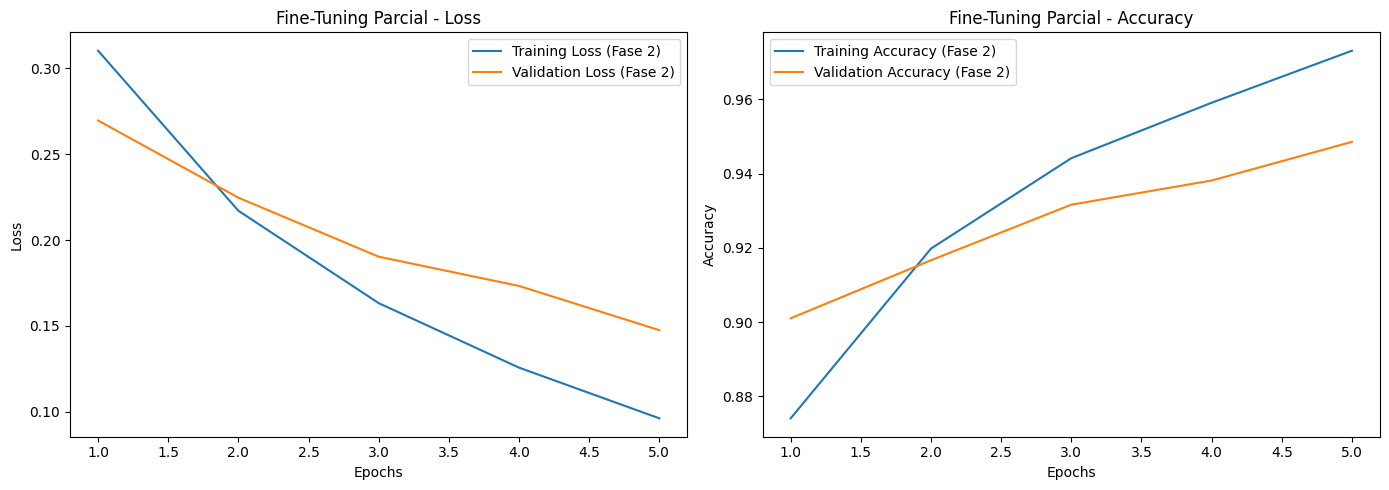

40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 393ms/step


2025-05-31 19:49:15.539738: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


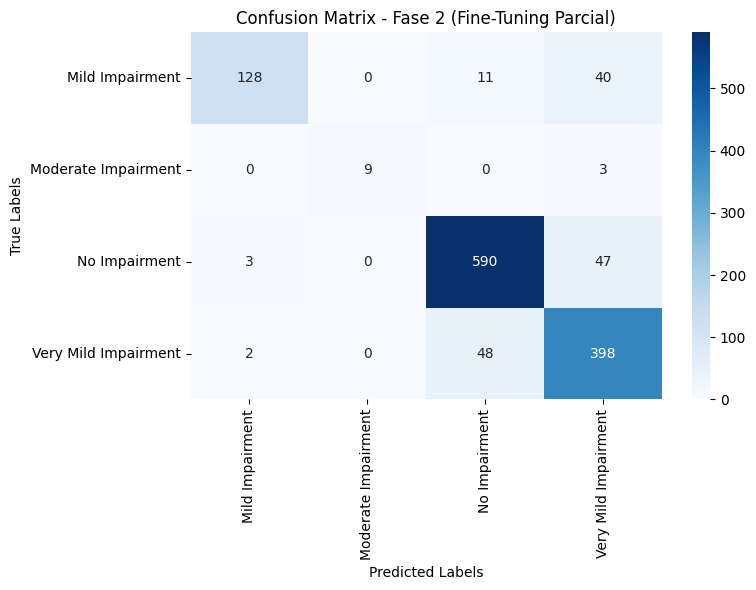

Epoch 1/12
272/272 ━━━━━━━━━━━━━━━━━━━━ 363s 1s/step - accuracy: 0.9841 - loss: 0.0667 - val_accuracy: 0.9655 - val_loss: 0.1002
Epoch 2/12
272/272 ━━━━━━━━━━━━━━━━━━━━ 361s 1s/step - accuracy: 0.9893 - loss: 0.0534 - val_accuracy: 0.9674 - val_loss: 0.0961
Epoch 3/12
272/272 ━━━━━━━━━━━━━━━━━━━━ 348s 1s/step - accuracy: 0.9924 - loss: 0.0432 - val_accuracy: 0.9661 - val_loss: 0.0943
Epoch 4/12
272/272 ━━━━━━━━━━━━━━━━━━━━ 352s 1s/step - accuracy: 0.9934 - loss: 0.0371 - val_accuracy: 0.9714 - val_loss: 0.0814
Epoch 5/12
272/272 ━━━━━━━━━━━━━━━━━━━━ 341s 1s/step - accuracy: 0.9955 - loss: 0.0318 - val_accuracy: 0.9720 - val_loss: 0.0811
Epoch 6/12
272/272 ━━━━━━━━━━━━━━━━━━━━ 374s 1s/step - accuracy: 0.9951 - loss: 0.0272 - val_accuracy: 0.9714 - val_loss: 0.0720
Epoch 7/12
272/272 ━━━━━━━━━━━━━━━━━━━━ 351s 1s/step - accuracy: 0.9973 - loss: 0.0240 - val_accuracy: 0.9766 - val_loss: 0.0684
Epoch 8/12
272/272 ━━━━━━━━━━━━━━━━━━━━ 346s 1s/step - accuracy: 0.9980 - loss: 0.0211 - val_accu

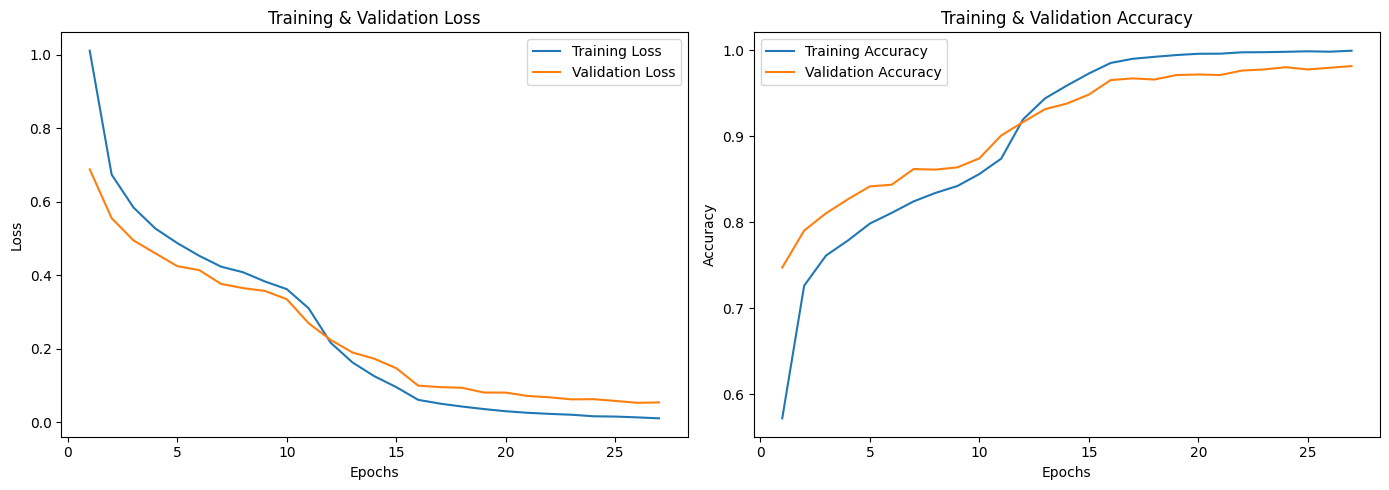

40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 366ms/step - accuracy: 0.9589 - loss: 0.1172

🔍 Test Accuracy: 0.9617
📉 Test Loss: 0.1152
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 365ms/step

📊 Classification Report (Final):
                      precision    recall  f1-score   support

     Mild Impairment       0.96      0.96      0.96       179
 Moderate Impairment       0.86      1.00      0.92        12
       No Impairment       0.96      0.98      0.97       640
Very Mild Impairment       0.97      0.94      0.95       448

            accuracy                           0.96      1279
           macro avg       0.94      0.97      0.95      1279
        weighted avg       0.96      0.96      0.96      1279



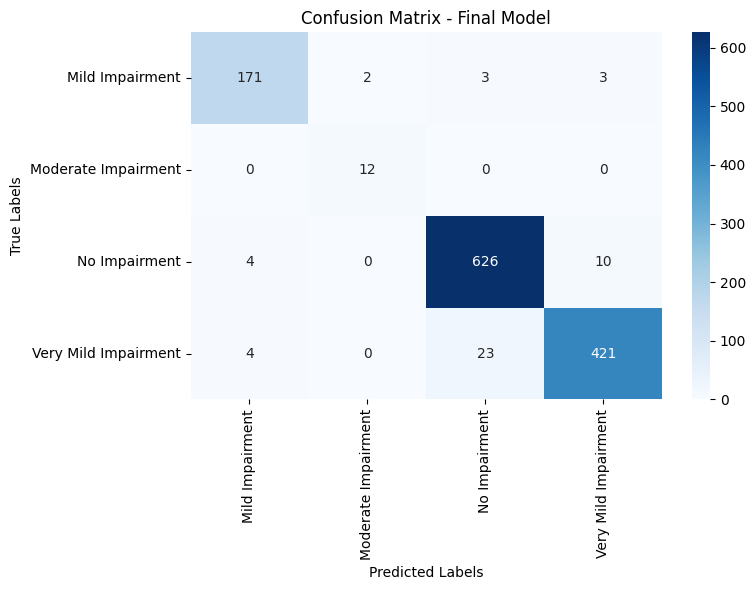

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, Model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

img_size = (128, 128)
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE
train_dir = './data/train'
val_dir = './data/val'
test_dir = './data/test'

def prepare_datasets():
    normalization_layer = tf.keras.layers.Rescaling(1./255)

    def format_ds(ds, shuffle=False):
        ds = ds.map(lambda x, y: (normalization_layer(x), y))
        if shuffle:
            ds = ds.shuffle(1000)
        return ds.cache().prefetch(AUTOTUNE)

    train_ds = tf.keras.utils.image_dataset_from_directory(train_dir, image_size=img_size, batch_size=batch_size, label_mode='categorical')
    val_ds = tf.keras.utils.image_dataset_from_directory(val_dir, image_size=img_size, batch_size=batch_size, label_mode='categorical')
    test_ds_raw = tf.keras.utils.image_dataset_from_directory(test_dir, image_size=img_size, batch_size=batch_size, label_mode='categorical')

    class_names = test_ds_raw.class_names

    train_ds = format_ds(train_ds, shuffle=True)
    val_ds = format_ds(val_ds)
    test_ds = format_ds(test_ds_raw)

    return train_ds, val_ds, test_ds, class_names

train_ds, val_ds, test_ds, class_names = prepare_datasets()

base_model = VGG16(include_top=False, weights='imagenet', input_shape=(128, 128, 3))
base_model.trainable = False

x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(train_ds, validation_data=val_ds, epochs=10)
model.save("modelo_fase1.keras")

model = load_model("modelo_fase1.keras")
for layer in model.layers[15:19]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history2 = model.fit(train_ds, validation_data=val_ds, epochs=5)
model.save("modelo_fase2.keras")

epochs_ft2 = range(1, len(history2.history['loss']) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_ft2, history2.history['loss'], label='Training Loss (Fase 2)')
plt.plot(epochs_ft2, history2.history['val_loss'], label='Validation Loss (Fase 2)')
plt.title('Fine-Tuning Parcial - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_ft2, history2.history['accuracy'], label='Training Accuracy (Fase 2)')
plt.plot(epochs_ft2, history2.history['val_accuracy'], label='Validation Accuracy (Fase 2)')
plt.title('Fine-Tuning Parcial - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

model_fase2 = load_model("modelo_fase2.keras")
y_pred_probs_f2 = model_fase2.predict(test_ds)
y_pred_f2 = np.argmax(y_pred_probs_f2, axis=1)
y_true_f2 = np.concatenate([np.argmax(label.numpy(), axis=1) for _, label in test_ds])

cm_f2 = confusion_matrix(y_true_f2, y_pred_f2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_f2, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Fase 2 (Fine-Tuning Parcial)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

model = load_model("modelo_fase2.keras")
for layer in model.layers:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history3 = model.fit(train_ds, validation_data=val_ds, epochs=12, callbacks=[early_stop])
model.save("modelo_final.keras")

def combine_histories(h1, h2, h3):
    combined = {}
    for key in h1.history.keys():
        combined[key] = h1.history[key] + h2.history[key] + h3.history[key]
    return combined

full_history = combine_histories(history1, history2, history3)

epochs = range(1, len(full_history['loss']) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, full_history['loss'], label='Training Loss')
plt.plot(epochs, full_history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, full_history['accuracy'], label='Training Accuracy')
plt.plot(epochs, full_history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

model = load_model("modelo_final.keras")
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"\n🔍 Test Accuracy: {test_accuracy:.4f}")
print(f"📉 Test Loss: {test_loss:.4f}")

y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.concatenate([np.argmax(label.numpy(), axis=1) for _, label in test_ds])

print("\n📊 Classification Report (Final):")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Final Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()


Found 8704 files belonging to 4 classes.
Found 1536 files belonging to 4 classes.
Found 1279 files belonging to 4 classes.

🔍 Train Accuracy: 1.0000
📉 Train Loss: 0.0068

📊 Classification Report (Train):
                      precision    recall  f1-score   support

     Mild Impairment       1.00      1.00      1.00      2176
 Moderate Impairment       1.00      1.00      1.00      2176
       No Impairment       1.00      1.00      1.00      2176
Very Mild Impairment       1.00      1.00      1.00      2176

            accuracy                           1.00      8704
           macro avg       1.00      1.00      1.00      8704
        weighted avg       1.00      1.00      1.00      8704



2025-06-01 21:25:30.656035: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


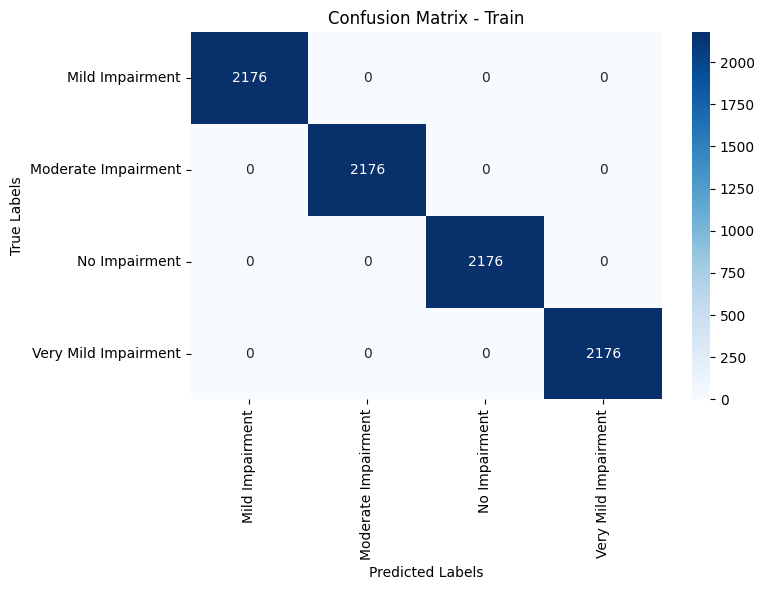


🔍 Validation Accuracy: 0.9798
📉 Validation Loss: 0.0534

📊 Classification Report (Validation):
                      precision    recall  f1-score   support

     Mild Impairment       0.99      0.99      0.99       384
 Moderate Impairment       0.99      1.00      1.00       384
       No Impairment       0.96      0.98      0.97       384
Very Mild Impairment       0.98      0.95      0.97       384

            accuracy                           0.98      1536
           macro avg       0.98      0.98      0.98      1536
        weighted avg       0.98      0.98      0.98      1536



2025-06-01 21:26:07.698977: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


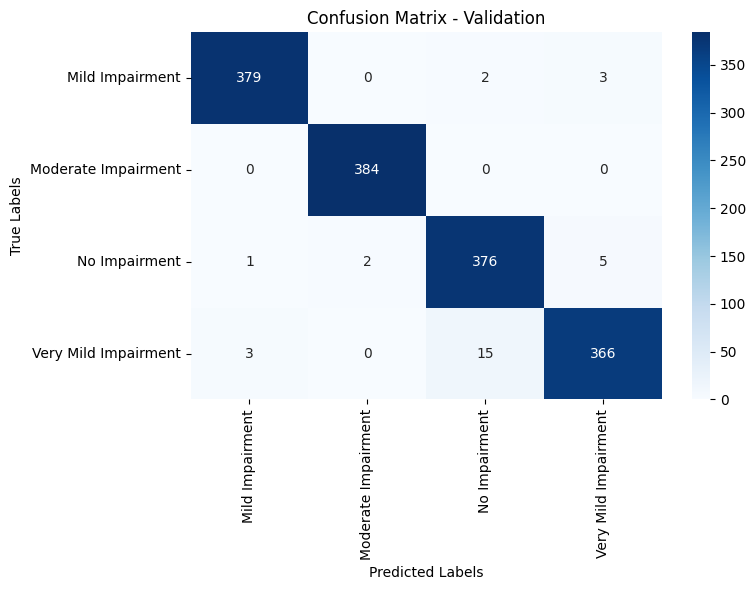


🔍 Test Accuracy: 0.9617
📉 Test Loss: 0.1152

📊 Classification Report (Test):
                      precision    recall  f1-score   support

     Mild Impairment       0.96      0.96      0.96       179
 Moderate Impairment       0.86      1.00      0.92        12
       No Impairment       0.96      0.98      0.97       640
Very Mild Impairment       0.97      0.94      0.95       448

            accuracy                           0.96      1279
           macro avg       0.94      0.97      0.95      1279
        weighted avg       0.96      0.96      0.96      1279



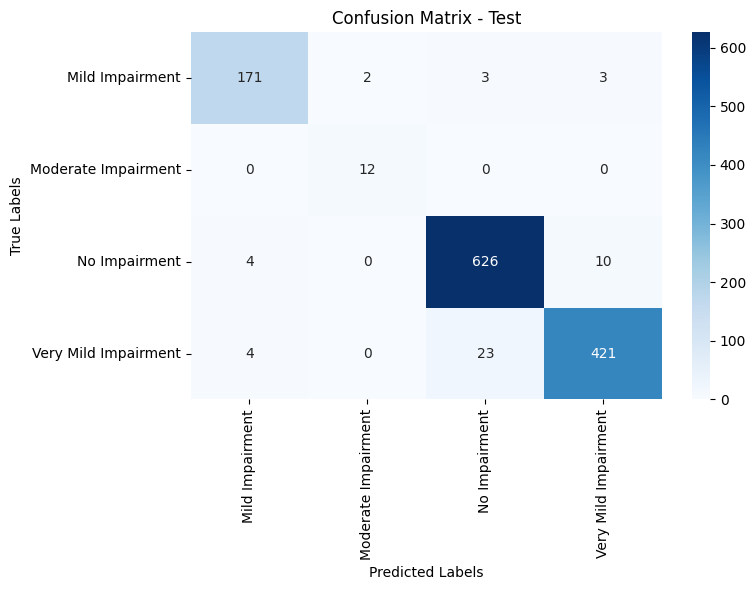

In [5]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, Model
from tensorflow.keras.callbacks import EarlyStopping

img_size = (128, 128)
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE
train_dir = './data/train'
val_dir = './data/val'
test_dir = './data/test'

normalization_layer = tf.keras.layers.Rescaling(1./255)

def format_ds(ds, shuffle=False):
    ds = ds.map(lambda x, y: (normalization_layer(x), y))
    if shuffle:
        ds = ds.shuffle(1000)
    return ds.cache().prefetch(AUTOTUNE)

train_ds_raw = tf.keras.utils.image_dataset_from_directory(
    train_dir, image_size=img_size, batch_size=batch_size, label_mode='categorical')
val_ds_raw = tf.keras.utils.image_dataset_from_directory(
    val_dir, image_size=img_size, batch_size=batch_size, label_mode='categorical')
test_ds_raw = tf.keras.utils.image_dataset_from_directory(
    test_dir, image_size=img_size, batch_size=batch_size, label_mode='categorical')

class_names = train_ds_raw.class_names

train_ds = format_ds(train_ds_raw, shuffle=True)
val_ds = format_ds(val_ds_raw)
test_ds = format_ds(test_ds_raw)

model = load_model("modelo_final.keras")

def evaluate_and_plot(dataset, dataset_name, class_names):
    loss, accuracy = model.evaluate(dataset, verbose=0)
    print(f"\n🔍 {dataset_name} Accuracy: {accuracy:.4f}")
    print(f"📉 {dataset_name} Loss: {loss:.4f}")

    y_pred_probs = model.predict(dataset, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.concatenate([np.argmax(label.numpy(), axis=1) for _, label in dataset])

    print(f"\n📊 Classification Report ({dataset_name}):")
    print(classification_report(y_true, y_pred, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {dataset_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.tight_layout()
    plt.show()

evaluate_and_plot(train_ds, "Train", class_names)
evaluate_and_plot(val_ds, "Validation", class_names)
evaluate_and_plot(test_ds, "Test", class_names)